In [1]:
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('brown')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import nltk

In [3]:
selected_brands_df_curu=pd.read_csv('data.csv')

In [4]:
selected_brands_df_curu.head(30)

,ProductName,Username,Reviews,Ratings,brand_name
0,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Gertrude,I use this a night instead of moisturiser. It’...,5,La
1,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Jessbabich,I love it love it! It’s amazing light weight! ...,5,La
2,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Colleen P,I cannot believe how hydrated my skin feels. ...,5,La
3,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Becky boo,Can't speak highly enough of la roche posay pr...,5,La
4,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,JCLeigh,My skin has never looked better since using th...,5,La
5,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Shahzi,Feels very light and healthy on my skin. Love ...,5,La
6,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Ks21,I received this serum from LRP community it's ...,5,La
7,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,AM83,My face feels excellent after using this produ...,5,La
8,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,Beryl7,I always have some of this product to hand. I...,5,La
9,La Roche-Posay Hyalu B5 Hyaluronic Acid Anti-A...,glow2,This serum has quickly become a staple in my s...,5,La


## User-Based Collaborative Filtering using Ratings from the data 

In [5]:
# Aggregate the ratings by Username and ProductName, taking the average if there are duplicates
aggregated_df = selected_brands_df_curu.groupby(['Username', 'ProductName']).agg({'Ratings': 'mean'}).reset_index()

 
# Create the interaction matrix from the aggregated DataFrame
interaction_matrix = aggregated_df.pivot(index='Username', columns='ProductName', values='Ratings').fillna(0)

# Creating the User similarity Matrix which contains the information about the similar users

user_similarity = cosine_similarity(interaction_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=interaction_matrix.index, columns=interaction_matrix.index)

# Creating a function which takes target user, user similarity matrix and the interaction matrix as an input

def recommend_products(target_user, user_similarity_df, interaction_matrix, n_recommendations=5):
    if target_user not in user_similarity_df.index:
        return []


    similar_users = user_similarity_df.loc[target_user].sort_values(ascending=False)[1:].index
    target_user_rated_products = set(interaction_matrix.loc[target_user][interaction_matrix.loc[target_user] > 0].index)

    recommendations = {}
    for user in similar_users:
        user_rated_products = set(interaction_matrix.loc[user][interaction_matrix.loc[user] > 0].index)

        recommendable = user_rated_products - target_user_rated_products

        for product in recommendable:

            if product not in recommendations:

                recommendations[product] = 0

            recommendations[product] += user_similarity_df.loc[target_user, user] * interaction_matrix.loc[user, product]


    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]

    return [product for product, score in sorted_recommendations]

#### Testing recommendation model on some users 

In [6]:
target_user = 'Emma2237' 

recommendations = recommend_products(target_user, user_similarity_df, interaction_matrix, n_recommendations=5)

print(recommendations)

['Neutrogena Advanced Acne Cleanser 150ml', 'Avene Thermal Spring Water 300ml - Mist for Sensitive skin', 'Neutrogena Oil Free Pink Grapefruit Scrub 125ml', 'La Roche Posay Effaclar Foaming Gel 400ml', 'La Roche-Posay Redermic Vitamin C10 Serum 30ml']


In [7]:
target_user = 'Colleen P'  

recommendations = recommend_products(target_user, user_similarity_df, interaction_matrix, n_recommendations=5)

print(recommendations)

['La Roche-Posay Redermic Vitamin C10 Serum 30ml', 'La Roche Posay Retinol B3 Anti-Ageing Serum 30ml', 'La Roche Posay Anthelios Invisible Fluid SPF 50+ 50ml', 'La Roche-Posay Effaclar Purifying Foaming Gel Anti-Acne Cleanser 200mL', 'La Roche Posay Effaclar Foaming Gel 400ml']


In [8]:
target_user = 'Asash4'  

recommendations = recommend_products(target_user, user_similarity_df, interaction_matrix, n_recommendations=5)

print(recommendations)

['Neutrogena Makeup Remover Cleansing Towelettes Wipes 25 Pack', 'Neutrogena Oil-Free Daily Scrub Acne-Prone Skin 125mL', 'Neutrogena Deep Clean Invigorating Foaming Scrub 125mL', 'La Roche-Posay Redermic Vitamin C10 Serum 30ml', 'Neutrogena Hydro Boost Hydrating Hydrogel Mask 30g']


In [9]:
target_user = 'Kristina H.'  

recommendations = recommend_products(target_user, user_similarity_df, interaction_matrix, n_recommendations=3)

print(recommendations)

['Avene Thermal Spring Water 300ml - Mist for Sensitive skin', 'Avene XeraCalm A.D Lipid-Replenishing Balm 400ml', 'La Roche Posay Retinol B3 Anti-Ageing Serum 30ml']


#### Updating the data by removing the invalid users

In [10]:

# Filter out rows with empty usernames or single special character usernames
selected_brands_df_curu = selected_brands_df_curu[selected_brands_df_curu['Username'].str.len() > 1]

# If you also want to specifically remove rows with 'Anonymous' as the username, you can add:
selected_brands_df_curu = selected_brands_df_curu[selected_brands_df_curu['Username'] != 'Anonymous']

## User-Based Collaborative Filtering using Ratings and Reviews from the data 

In [11]:
from textblob import TextBlob
 

# Compute sentiment polarity for each review

selected_brands_df_curu['Sentiment'] = selected_brands_df_curu['Reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


# Aggregate sentiment and ratings for each Username and ProductName

aggregated_df = selected_brands_df_curu.groupby(['Username', 'ProductName']).agg({'Sentiment': 'mean', 'Ratings': 'mean'}).reset_index()


# Define a weight for sentiment

sentiment_weight = 0.7  # This implies a 0.3 weight for Ratings giving sentiment more weightage 
 

# Calculate the weighted score 

aggregated_df['WeightedScore'] = aggregated_df['Sentiment'] * sentiment_weight + aggregated_df['Ratings'] * (1 - sentiment_weight)


interaction_matrix = aggregated_df.pivot(index='Username', columns='ProductName', values='WeightedScore').fillna(0)


user_similarity = cosine_similarity(interaction_matrix)

user_similarity_df = pd.DataFrame(user_similarity, index=interaction_matrix.index, columns=interaction_matrix.index)

 

# Function to generate recommendations which takes target user, user similarity matrix and the interaction matrix as an inpu

def recommend_products(target_user, user_similarity_df, interaction_matrix, n_recommendations=5):

    if target_user not in user_similarity_df.index:

        return []


    similar_users = user_similarity_df.loc[target_user].sort_values(ascending=False)[1:].index

    target_user_rated_products = set(interaction_matrix.loc[target_user][interaction_matrix.loc[target_user] > 0].index)


    recommendations = {}

    for user in similar_users:

        user_rated_products = set(interaction_matrix.loc[user][interaction_matrix.loc[user] > 0].index)

        recommendable = user_rated_products - target_user_rated_products

        for product in recommendable:

            if product not in recommendations:

                recommendations[product] = 0

            recommendations[product] += user_similarity_df.loc[target_user, user] * interaction_matrix.loc[user, product]


    sorted_recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)[:n_recommendations]

    return [product for product, score in sorted_recommendations]


#### Testing recommendation model on some users 

In [12]:
target_user = 'Emma2237'  

recommendations = recommend_products(target_user, user_similarity_df, interaction_matrix, n_recommendations=5)

print(recommendations)

['Neutrogena Advanced Acne Cleanser 150ml', 'La Roche Posay Effaclar Foaming Gel 400ml', 'Neutrogena Oil Free Pink Grapefruit Scrub 125ml', 'Avene Thermal Spring Water 300ml - Mist for Sensitive skin', 'La Roche-Posay Redermic Vitamin C10 Serum 30ml']


In [13]:
target_user = 'Colleen P'  

recommendations = recommend_products(target_user, user_similarity_df, interaction_matrix, n_recommendations=5)

print(recommendations)

['La Roche-Posay Redermic Vitamin C10 Serum 30ml', 'La Roche Posay Retinol B3 Anti-Ageing Serum 30ml', 'La Roche Posay Anthelios Invisible Fluid SPF 50+ 50ml', 'La Roche Posay Effaclar Foaming Gel 400ml', 'La Roche-Posay Effaclar Purifying Foaming Gel Anti-Acne Cleanser 200mL']


In [14]:
target_user = 'Asash4'  

recommendations = recommend_products(target_user, user_similarity_df, interaction_matrix, n_recommendations=5)

print(recommendations)

['Neutrogena Makeup Remover Cleansing Towelettes Wipes 25 Pack', 'Neutrogena Oil-Free Daily Scrub Acne-Prone Skin 125mL', 'Neutrogena Deep Clean Invigorating Foaming Scrub 125mL', 'La Roche-Posay Redermic Vitamin C10 Serum 30ml', 'Neutrogena Hydro Boost Hydrating Hydrogel Mask 30g']


In [15]:
target_user = 'Kristina H.'  

recommendations = recommend_products(target_user, user_similarity_df, interaction_matrix, n_recommendations=3)

print(recommendations)

['Avene Thermal Spring Water 300ml - Mist for Sensitive skin', 'Avene XeraCalm A.D Lipid-Replenishing Balm 400ml', 'La Roche Posay Retinol B3 Anti-Ageing Serum 30ml']


## Visualizing Method 1: Creating heatmap for the User-Product Interaction and visualising similarity matrix

            Ratings     Sentiment
count  24198.000000  24198.000000
mean       3.940036      0.283131
std        1.345476      0.227947
min        1.000000     -1.000000
25%        2.000000      0.142598
50%        5.000000      0.271429
75%        5.000000      0.411667
max        5.000000      1.000000
Number of unique Users: 13614
Number of unique Products: 45


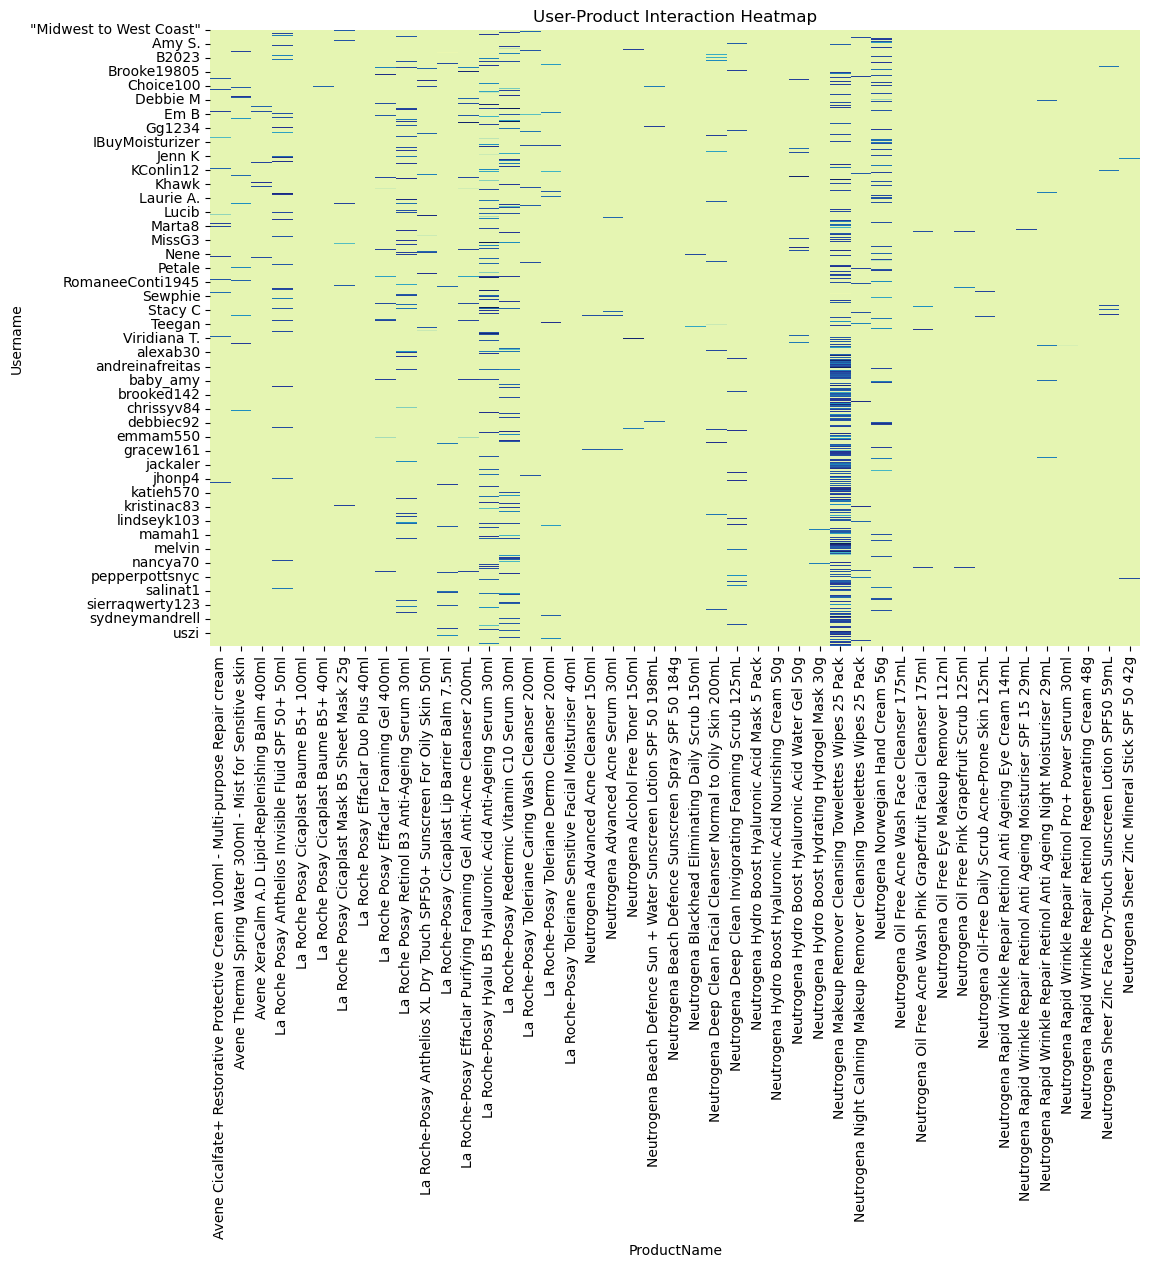

Correlation between Sentiment and Ratings:
           Sentiment   Ratings
Sentiment   1.000000  0.116114
Ratings     0.116114  1.000000


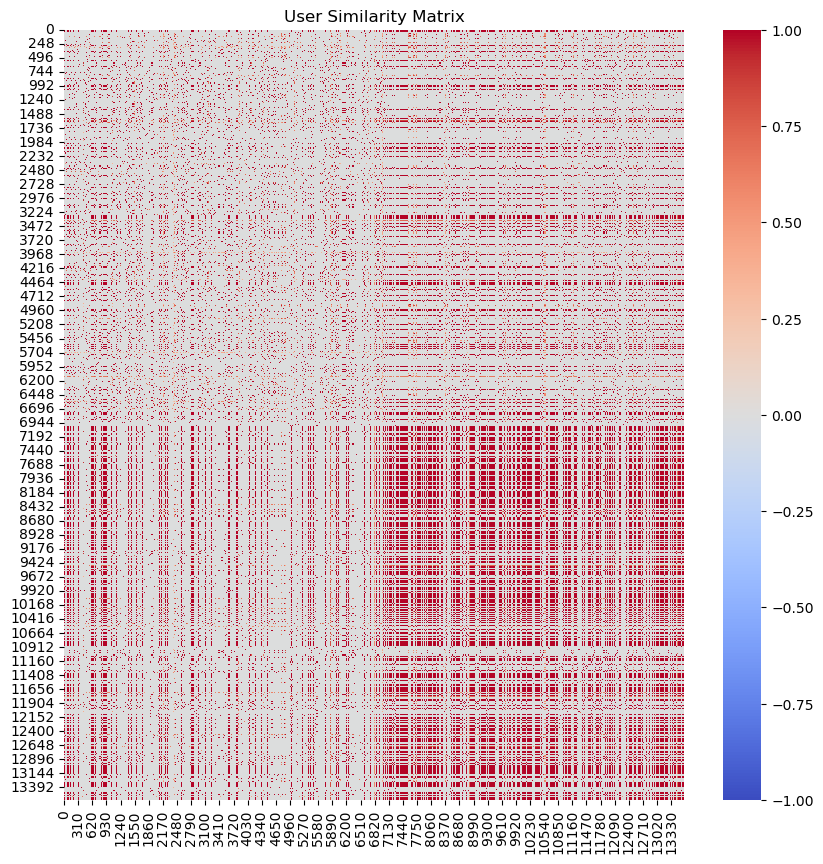

In [16]:
# Display basic statistics about the data
print(selected_brands_df_curu.describe())


# Count of unique Users and Products
num_users = len(selected_brands_df_curu['Username'].unique())
num_products = len(selected_brands_df_curu['ProductName'].unique())
print(f"Number of unique Users: {num_users}")
print(f"Number of unique Products: {num_products}")


# Heatmap of User-Product interactions
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_matrix, cmap="YlGnBu", cbar=False)
plt.title('User-Product Interaction Heatmap')
plt.show()

# Pairwise correlation between Sentiment and Ratings
correlation = selected_brands_df_curu[['Sentiment', 'Ratings']].corr()
print("Correlation between Sentiment and Ratings:")
print(correlation)

# Visualize user similarity matrix 
plt.figure(figsize=(10, 10))
sns.heatmap(user_similarity, cmap="coolwarm", cbar=True)
plt.title('User Similarity Matrix')
plt.show()


## Visualizing Method 2: Cosine Similarity Based on Ratings

Code to computed the cosine similarity between users based on their product ratings, a heatmap to visualize user similarity:

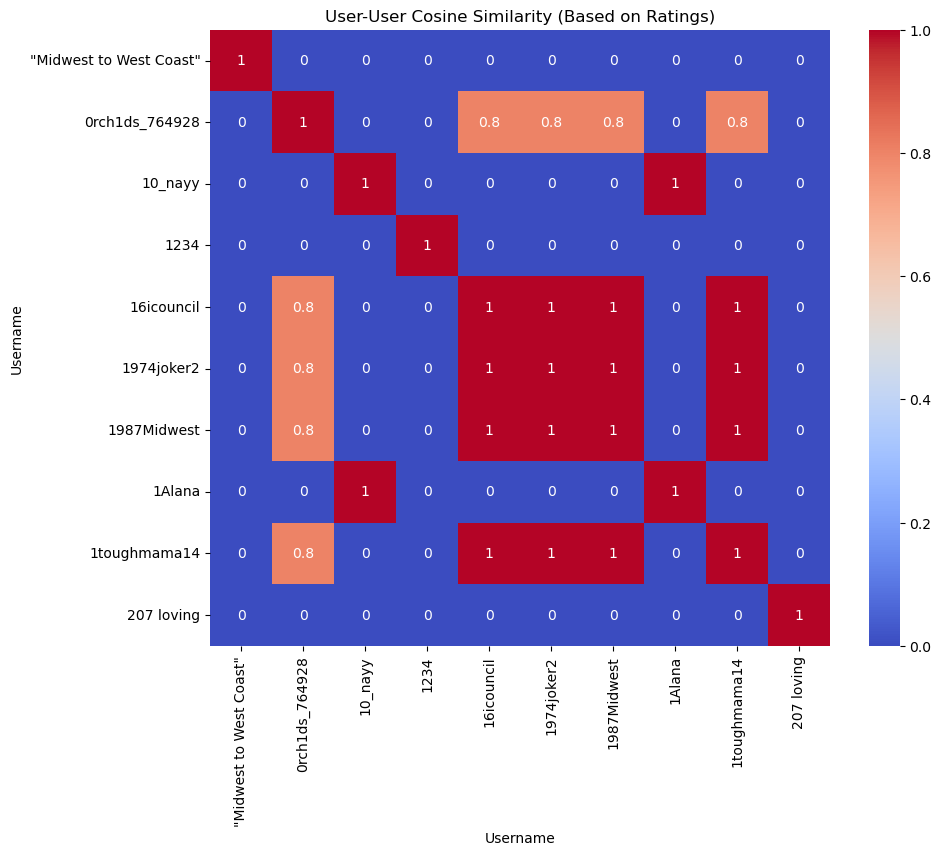

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a heatmap using the first 10x10 users for visualization purposes
plt.figure(figsize=(10, 8))
sns.heatmap(user_similarity_df.iloc[:10, :10], annot=True, cmap='coolwarm')
plt.title('User-User Cosine Similarity (Based on Ratings)')
plt.xlabel('Username')
plt.ylabel('Username')
plt.show()

## Visualizing Method 3: Aggregate Sentiment and Ratings

Calculated a weighted score based on sentiment and ratings, visualizing the sentiment, ratings, and the resultant weighted score using scatter plots or other meaningful visualizations.


Scatter Plot of Sentiment vs. Ratings

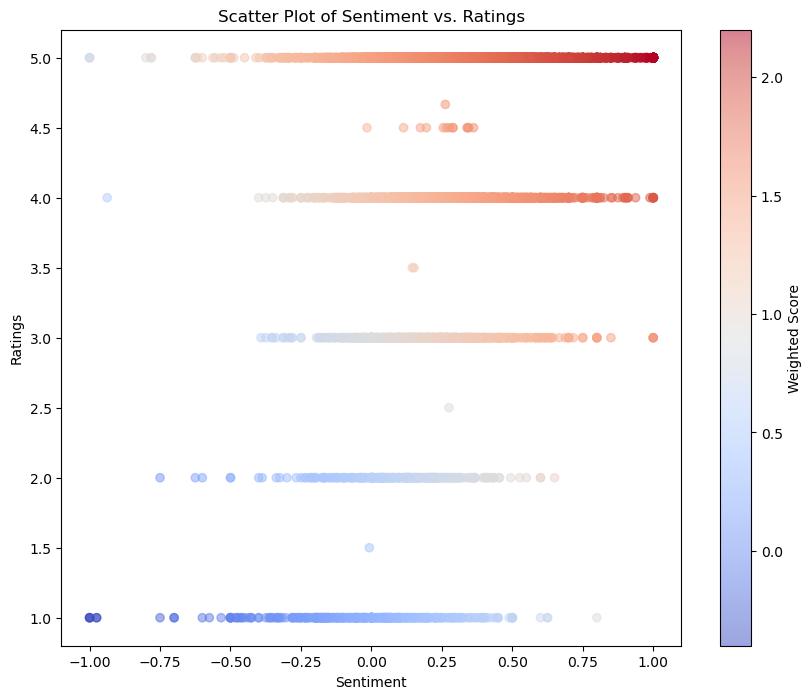

In [19]:
plt.figure(figsize=(10, 8))
plt.scatter(aggregated_df['Sentiment'], aggregated_df['Ratings'], c=aggregated_df['WeightedScore'], cmap='coolwarm', alpha=0.5)
plt.title('Scatter Plot of Sentiment vs. Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Ratings')
plt.colorbar(label='Weighted Score')
plt.show()

Distribution of Weighted Scores

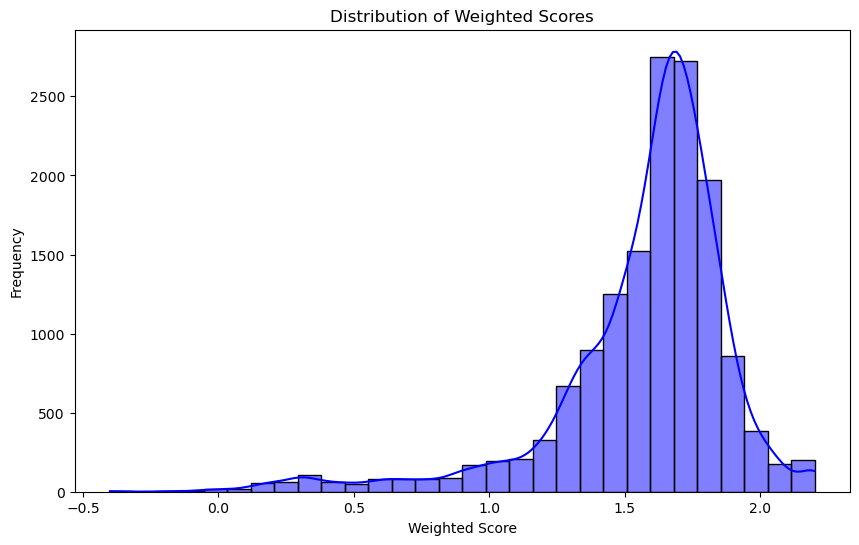

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(aggregated_df['WeightedScore'], bins=30, kde=True, color='blue')
plt.title('Distribution of Weighted Scores')
plt.xlabel('Weighted Score')
plt.ylabel('Frequency')
plt.show()

Sentiment and Rating Distributions
Moreover, to understand the distributions of sentiment and ratings, separate histograms might be useful:



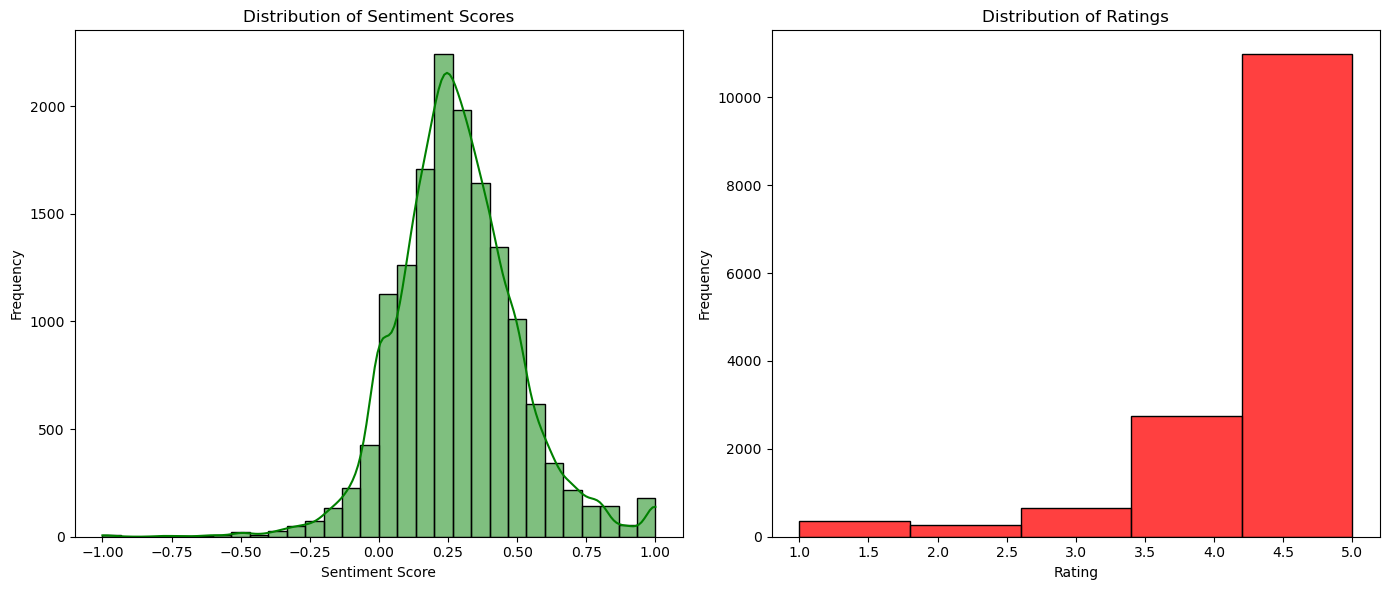

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(aggregated_df['Sentiment'], bins=30, kde=True, ax=axs[0], color='green')
axs[0].set_title('Distribution of Sentiment Scores')
axs[0].set_xlabel('Sentiment Score')
axs[0].set_ylabel('Frequency')

sns.histplot(aggregated_df['Ratings'], bins=5, kde=False, ax=axs[1], color='red')
axs[1].set_title('Distribution of Ratings')
axs[1].set_xlabel('Rating')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Visualizing Method 4 : Heatmap fro the interaction matrix for top 5 products

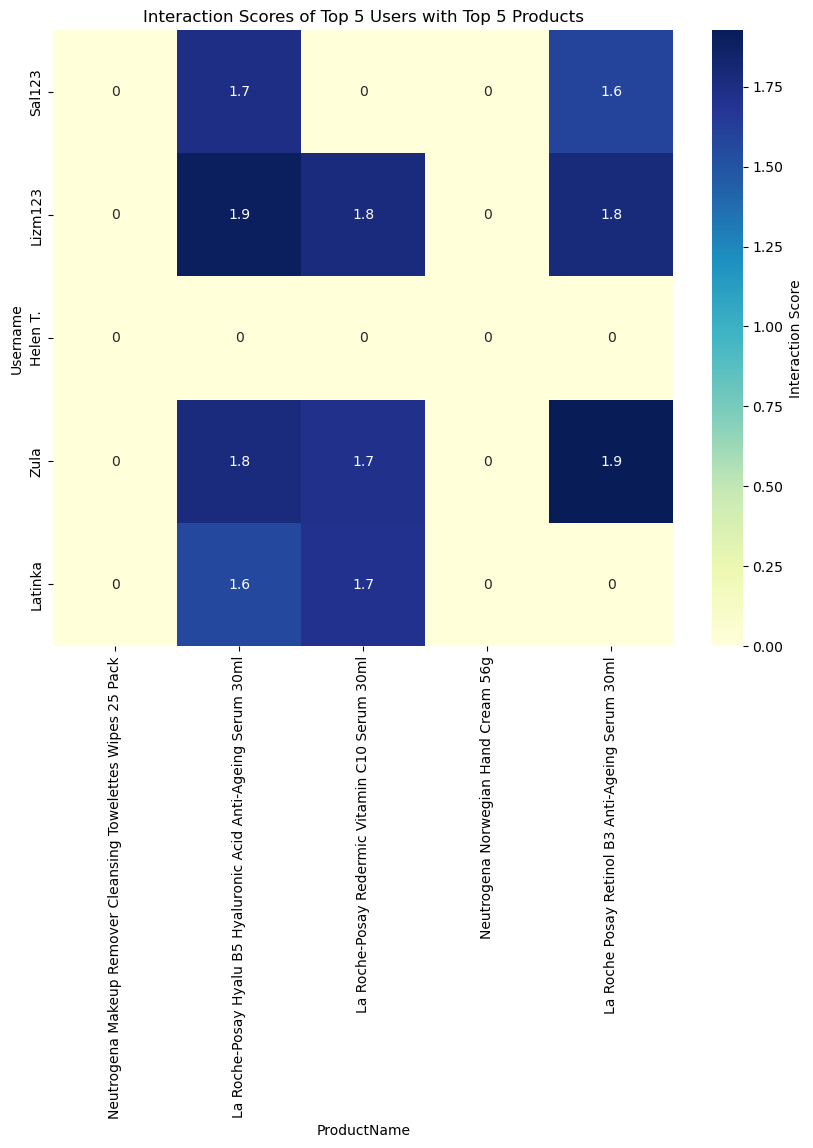

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming interaction_matrix is already defined in your environment

# Extracting top 5 users and top 5 products
# (You can modify this logic based on what determines "top" in your context, for now I assume it's based on the number of interactions)
top_5_users = interaction_matrix.sum(axis=1).nlargest(5).index
top_5_products = interaction_matrix.sum(axis=0).nlargest(5).index

# Subsetting the interaction matrix to get the interactions of top 5 users with top 5 products
subset_matrix = interaction_matrix.loc[top_5_users, top_5_products]

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(subset_matrix, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Interaction Score'})
plt.title("Interaction Scores of Top 5 Users with Top 5 Products")
plt.show()

### Exporting the data into CSV format 

In [24]:
selected_brands_df_curu.to_csv('data.csv', index=False)